# MCAR, MAR, MNAR en Python

## Tipos de valores faltantes

Vamos a analizar un set de datos sobre Diabetes

### Importando librerías

In [1]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

In [5]:
diabetes_df = pd.read_csv('dataset/pima-indians-diabetes.csv',sep=',')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Vemos como tenemos diferentes variables que estamos obteniendo a estas personas, ahora vamos a ver si tenemos valores faltantes con nuestra extensión.

In [9]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Importar extensión para usar los métodos 
%run pandas-missing-extension-re2.py

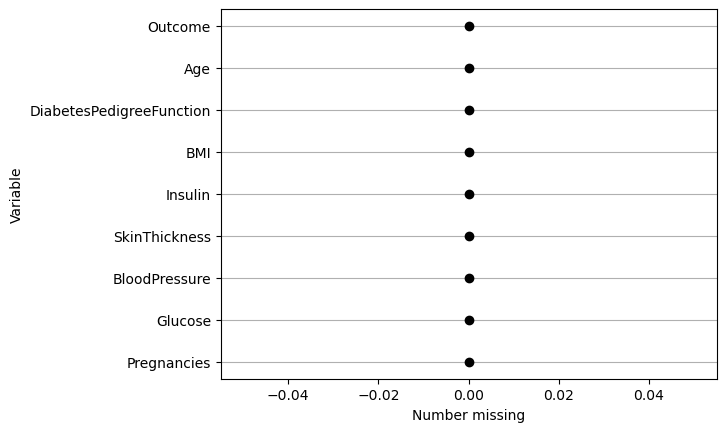

In [8]:
diabetes_df.missing.missing_variable_plot()

Como podemos ver nuestro set de datos parece estar completo, ya que ninguna variable posee algún valor faltante.

La realidad es que no, nuestros datos faltantes están enmascarados o codificados de otra manera, como: **0's**.

Vamos a realizar el proceso de encontrarlos y codificarlos adecuadamente.

In [11]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0,np.nan)

Vamos a ver que este comportamiento solo pasa de la columna 1 a 6, es decir los valores faltantes están codificados como **0's**. Lo que vamos a hacer es tomar esas columnas y realizar un reemplazo como hemos aprendido en las anteriores clases.

Una vez que hemos sustituido el valor de los valores faltantes de manera apropiada, procederemos a graficar nuestros resultados.

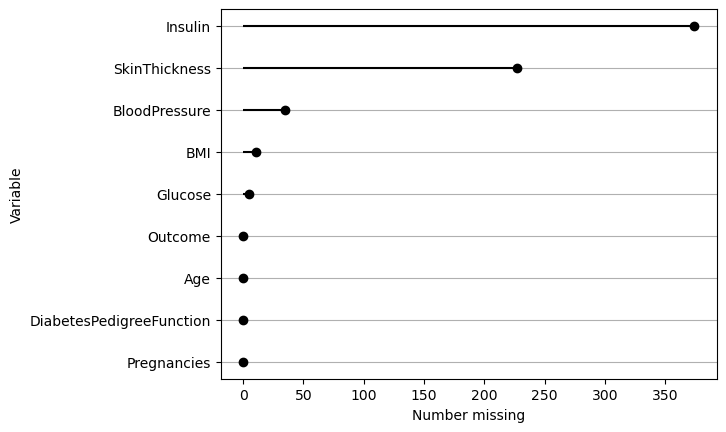

In [12]:
diabetes_df.missing.missing_variable_plot()

Ahora vemos como en realidad si tenemos valores faltantes. Está perfecto porque ya sabemos que algo está pasando ahí y nos falta analizar de manera adecuada.

Ahora vamos a contrastarlo con los diferentes tipos de valores faltantes que existen.

## Missing Completely At Random (MCAR)

In [13]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
)

,Insulin,SkinThickness,BloodPressure,BMI,Glucose,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,1
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,0
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,1
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,0
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,0
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,0
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,1


Ahora la columna que mas valores faltantes tiene aparece primero y así sucesivamente.

Después vamos a usar un `pipe` y usar la librería `misigno`.

<AxesSubplot:>

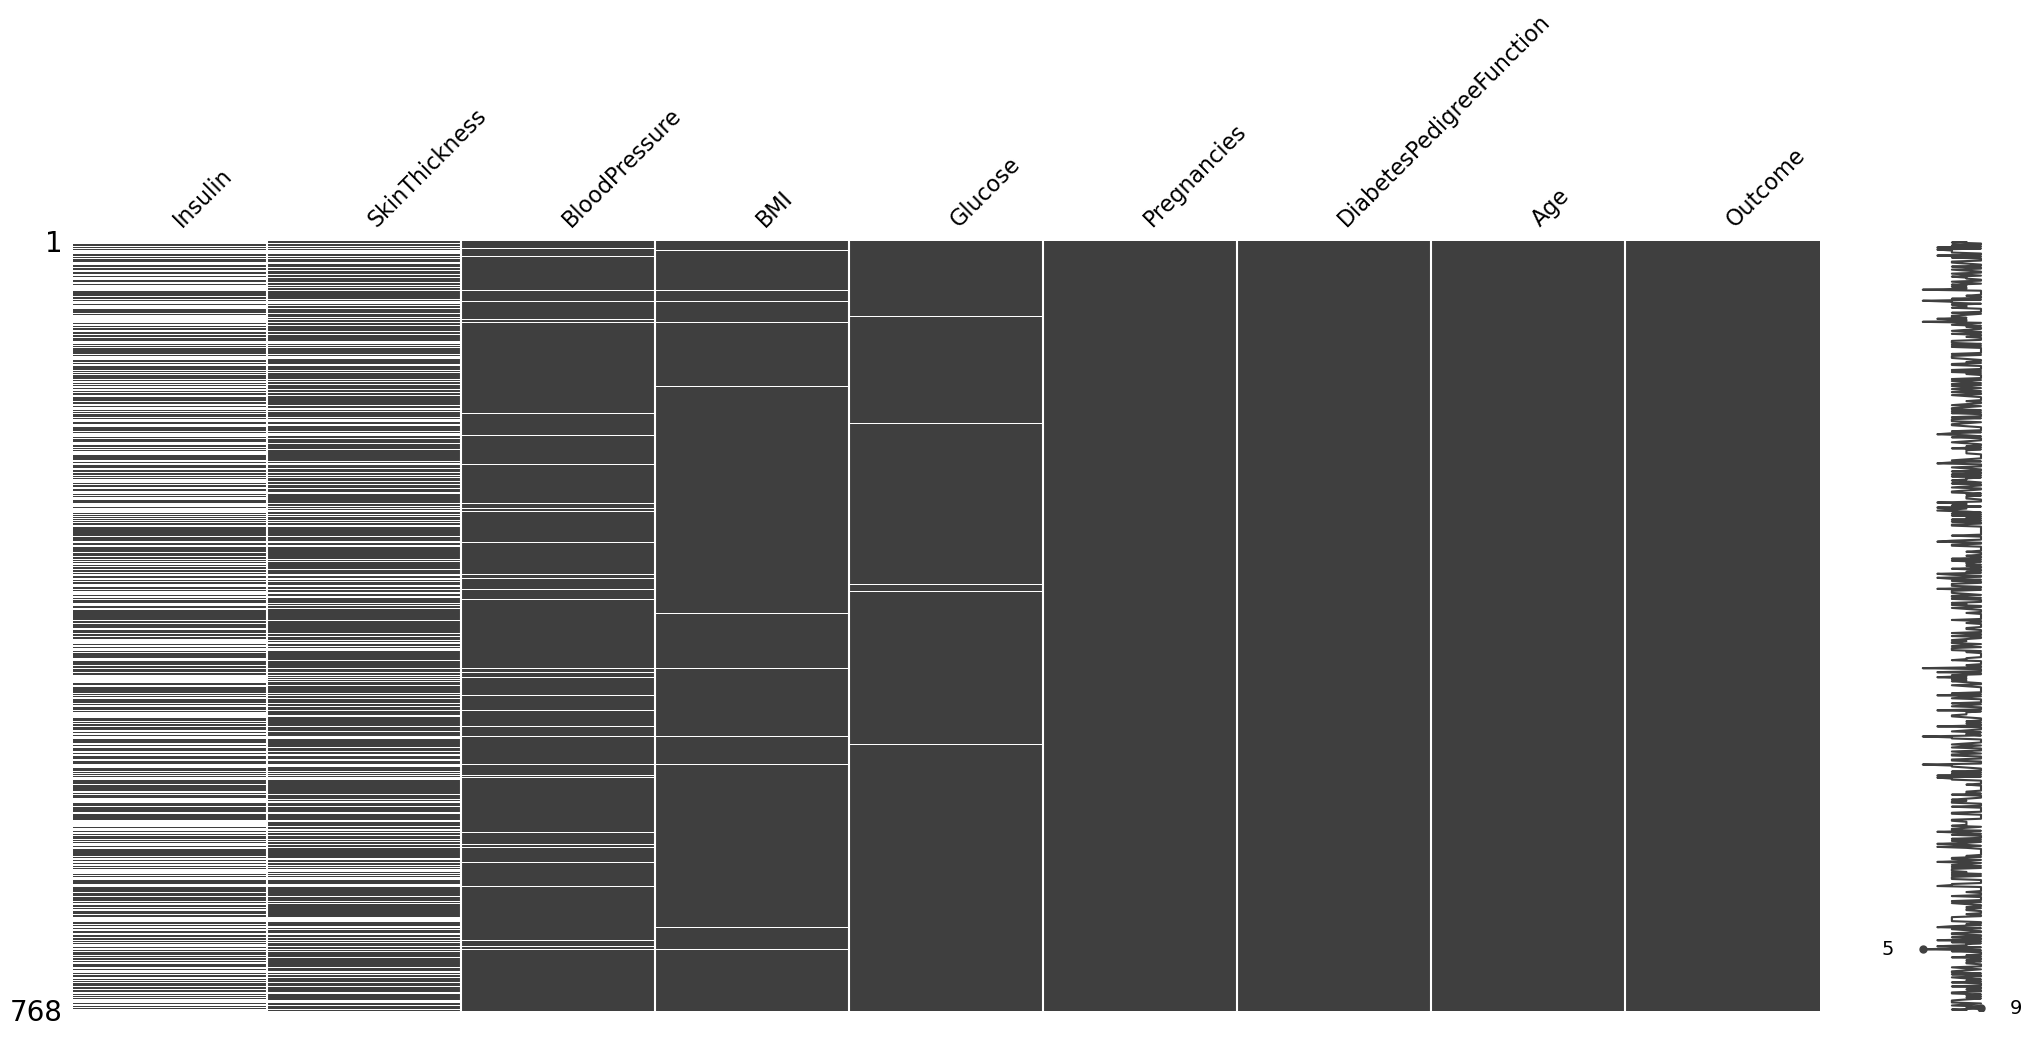

In [14]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

Vamos a ver el resultado y como se puede observar tenemos diferentes variables que tienen valores faltantes.

Pero como vemos en las 2 primeras columnas tenemos 2 valores faltantes, no obstante tanto para el `BloodPressure, BMI y Glucose` parece ser que son pocos.

Entonces para estos 3 como parece ser que su frecuencia de ocurrencia es muy baja podemos decir que son **Missing Completely at Random**. Simplemente algo paso en el momento y no pudimos cuantificar la cantidad por cuestiones de el azar.

Continuando el siguiente tipo que podemos visualizar es **Missing At Random**

## Missing at Random (MAR)

Vamos a utilizar el mismo código e identificar, entonces vamos a ordenar los valores por alguna columna

<AxesSubplot:>

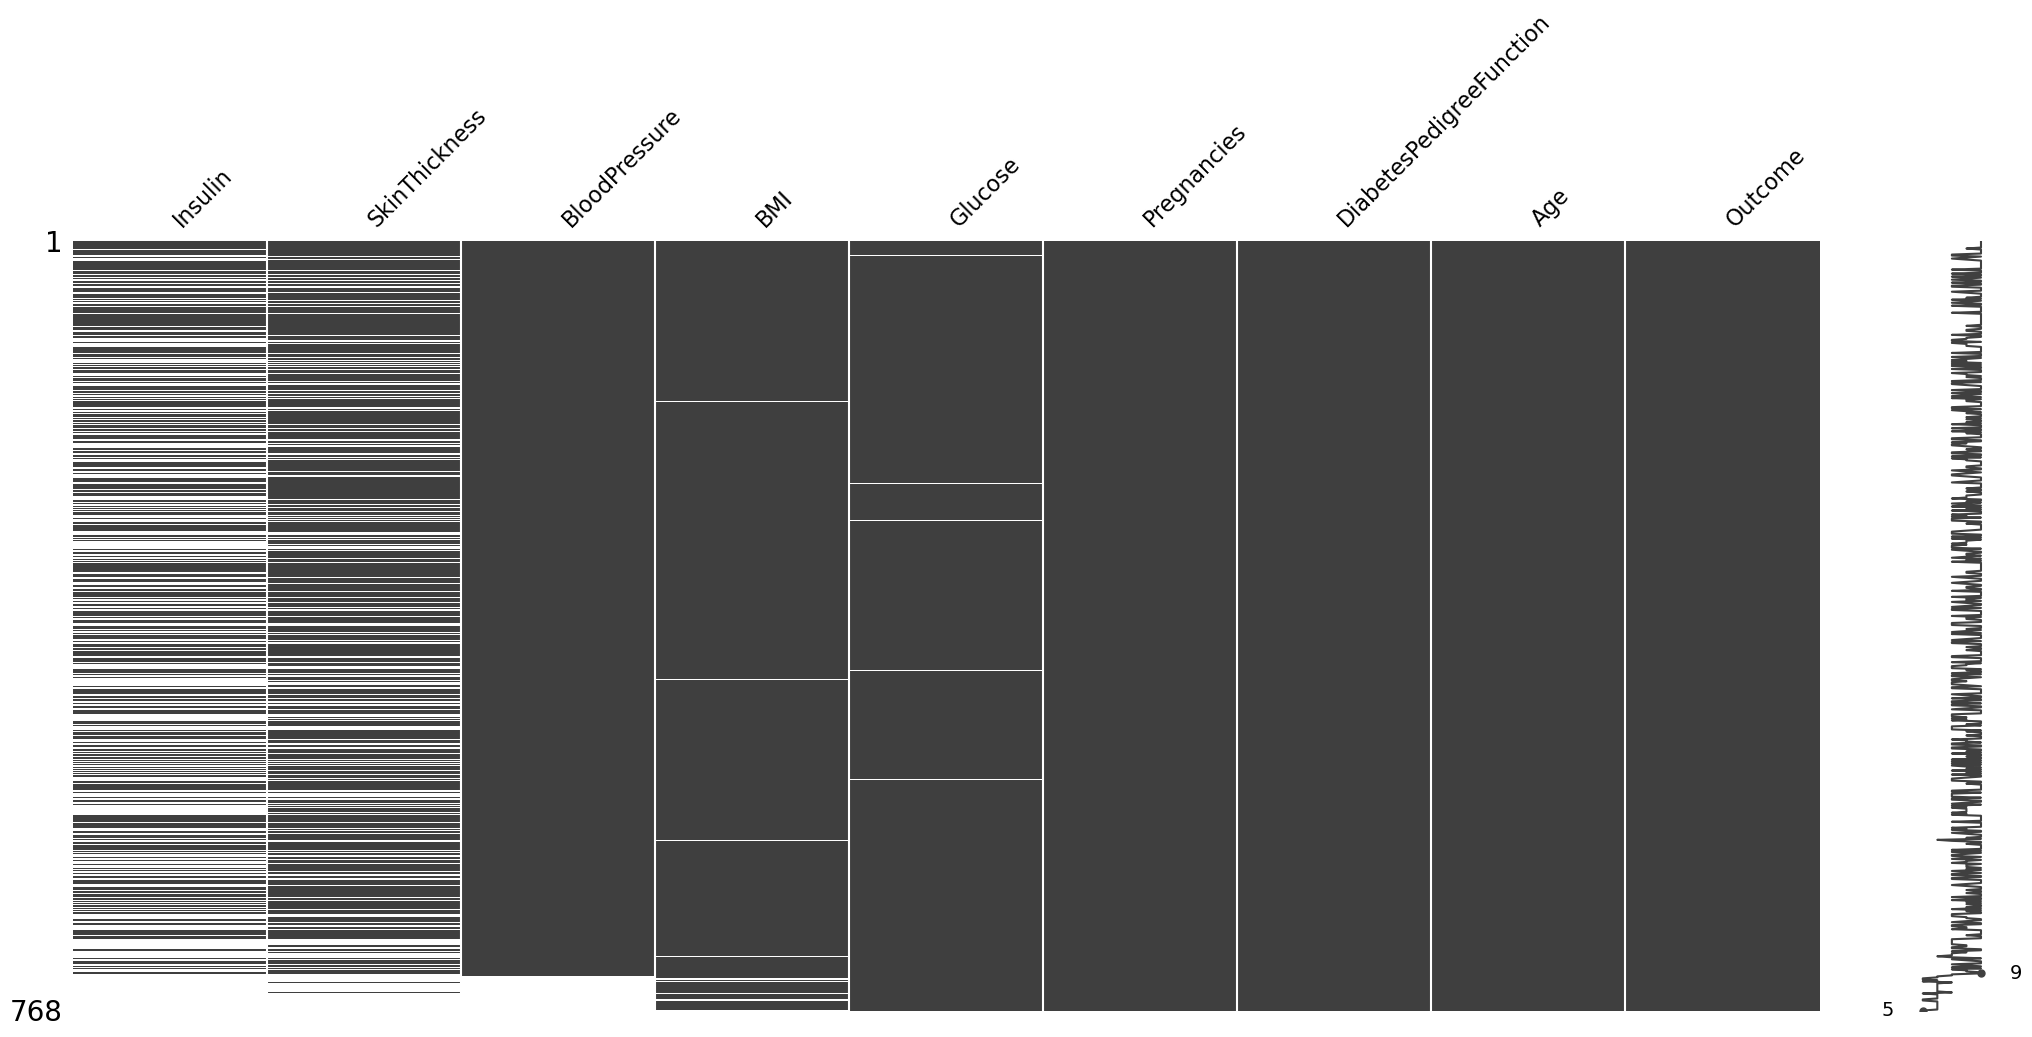

In [17]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .sort_values(by='BloodPressure')
    .pipe(missingno.matrix)
)

Podemos ver que nuestra columna tiene valores faltantes al inicio, hasta abajo de la gráfica. También en las otras columnas hay valores faltantes pero no está tan relacionado. 

Excepto por las 2 primeras de la izquierda que si podría estar relacionado. Entonces podemos decir qu estos datos están **Perdidos al azar pero dependen de un valor que estemos midiendo**, entonces podemos continuar y decir que estos datos son **Missing at Random**.

Hay que recalcar que no hay una forma segura de determinar a que tipo pertenecen pero si podemos hacer deducciones razonables y explicar estos casos.

## Missing not at Random (MNAR)

<AxesSubplot:>

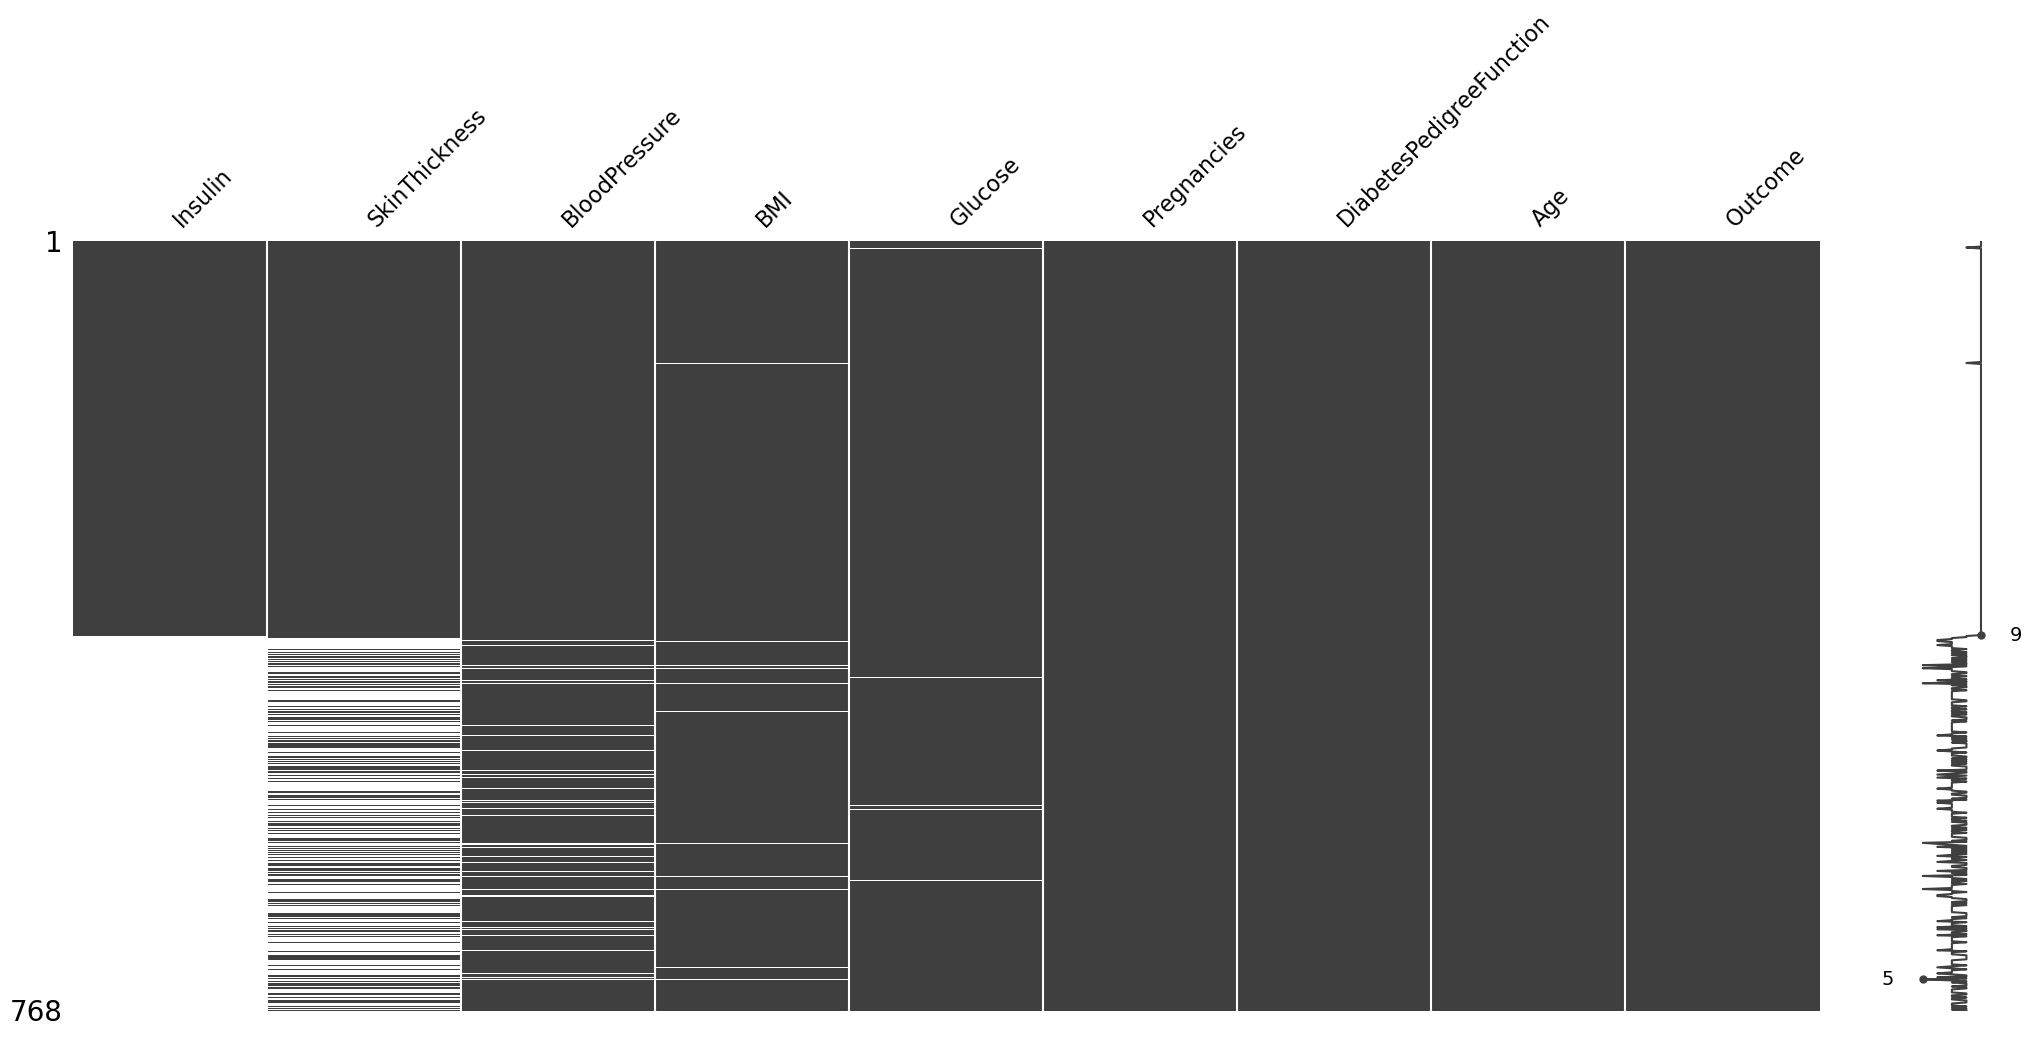

In [18]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .sort_values(by='Insulin')
    .pipe(missingno.matrix)
)

Veamos que pasa cuando los ordenamos por la variable `Insulin`, cuando esto pasa la variable `SkinThickness` en ocasiones tiene valores y en otras ocasiones tiene valores faltantes, pero `Insulin` no tiene completamente entonces esto lo podemos asociar a que nos falta una medición que podría o no estar debido a que está fuera de nuestro rango y se podría decir que es un caso (MNAR).

Así podemos hacer una relación de como visualmente podemos interpretar los tipos, sin embargo debemos recordar que no podemos determinar al 100% de que origen son los valores faltantes o cual es su causa de perdida. 

Pero si continuamos analizándolos podemos llegar a tener suposiciones razonables del por qué está sucediendo algo, siempre continua explorando y encontraras algo.